<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


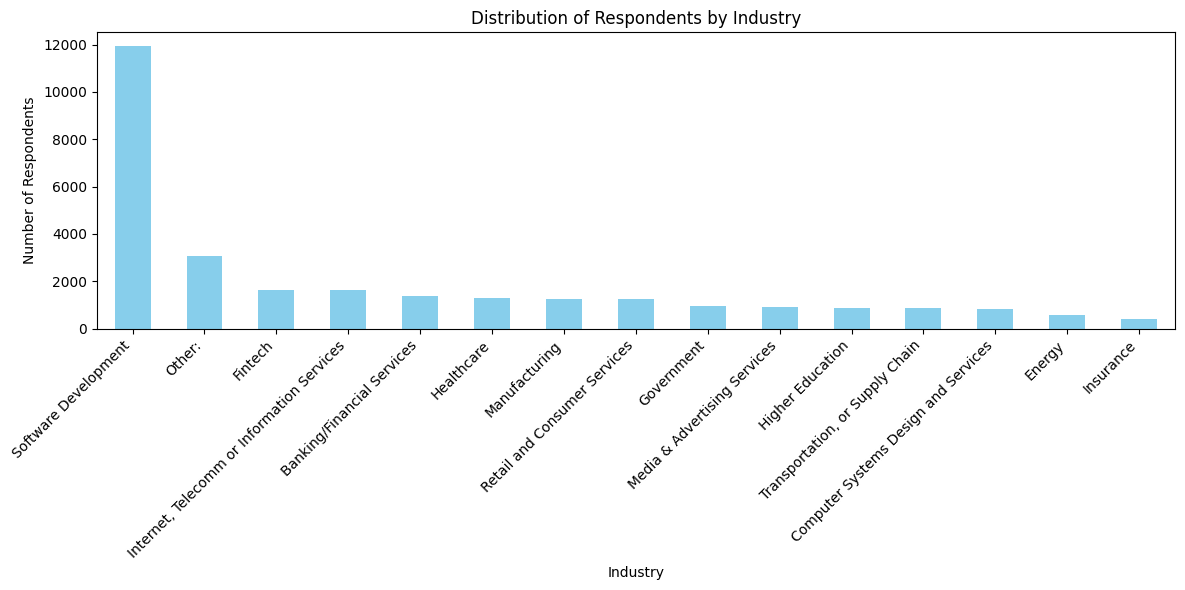

In [6]:
##Write your code here
df.columns
industry_counts = df['Industry'].value_counts().sort_values(ascending=False)
# Plot the bar chart
plt.figure(figsize=(12, 6))
industry_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [10]:
##Write your code here
# Drop missing values for accurate stats
comp = df['ConvertedCompYearly'].dropna()

# Calculate mean and standard deviation
mean_comp = comp.mean()
std_comp = comp.std()

# Define threshold (mean + 3*std)
threshold = mean_comp + 3 * std_comp

# Filter the rows where compensation exceeds threshold
high_earners = df[df['ConvertedCompYearly'] > threshold]

print(f"Mean Compensation: {mean_comp:.2f}")
print(f"Standard Deviation: {std_comp:.2f}")
print(f"Threshold (Mean + 3*STD): {threshold:.2f}")
print(f"Number of high outliers: {len(high_earners)}")

# Display the outlier rows
high_earners['ConvertedCompYearly']

Mean Compensation: 86155.29
Standard Deviation: 186756.97
Threshold (Mean + 3*STD): 646426.21
Number of high outliers: 89


529       650000.0
828      1000000.0
1932      945000.0
2171      750000.0
2187     2000000.0
           ...    
38219    1000000.0
39643    1300000.0
40066     800000.0
40952     750000.0
41027     700000.0
Name: ConvertedCompYearly, Length: 89, dtype: float64

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [11]:
##Write your code here

# Drop NaN values from the column
comp_data = df['ConvertedCompYearly'].dropna()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = comp_data.quantile(0.25)
Q3 = comp_data.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

# Print results
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of Outliers: {len(outliers)}")


Q1: 32712.0
Q3: 107971.5
IQR: 75259.5
Lower Bound: -80177.25
Upper Bound: 220860.75
Number of Outliers: 978


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [13]:
##Write your code here
# Create new DataFrame excluding outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]
print("Original DataFrame size:", df.shape)
print("New DataFrame size (no outliers):", df_no_outliers.shape)
print("Number of rows removed:", df.shape[0] - df_no_outliers.shape[0])


Original DataFrame size: (65437, 114)
New DataFrame size (no outliers): (22457, 114)
Number of rows removed: 42980


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


AgeNumeric             1.000000
WorkExp                0.850655
ConvertedCompYearly    0.121512
JobSat                 0.069844
CompTotal             -0.002761
JobSatPoints_1        -0.027908
ResponseId            -0.037967
JobSatPoints_8        -0.046092
JobSatPoints_6        -0.050228
JobSatPoints_4        -0.076032
JobSatPoints_9        -0.081633
JobSatPoints_7        -0.082683
JobSatPoints_5        -0.101475
JobSatPoints_11       -0.107092
JobSatPoints_10       -0.114350
Name: AgeNumeric, dtype: float64


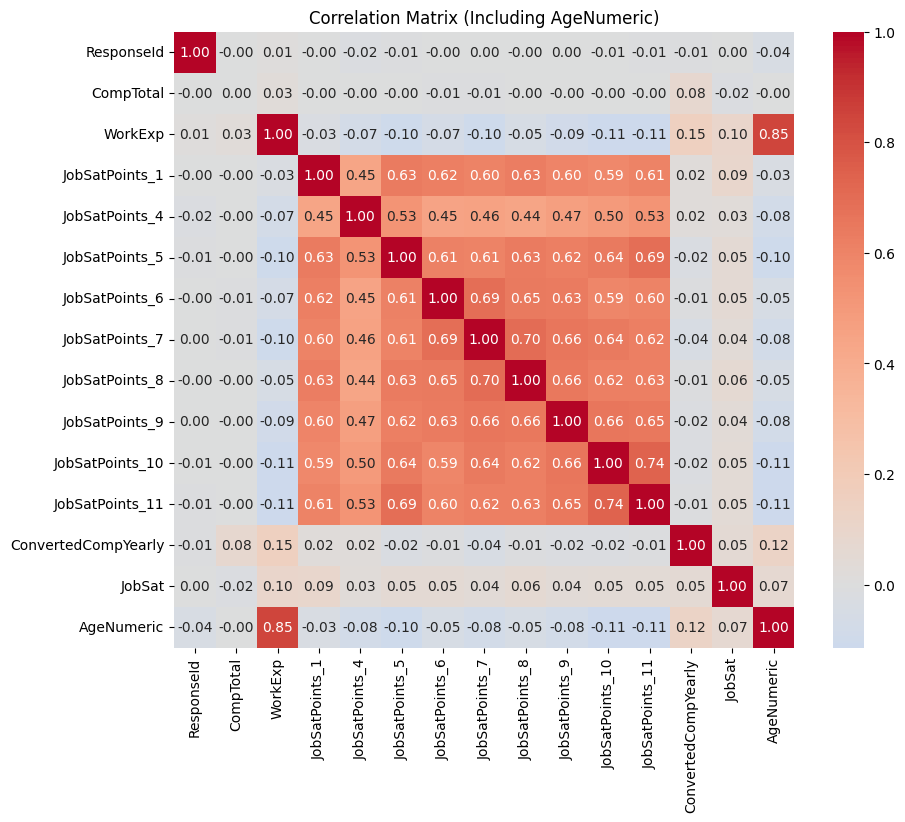

In [21]:
##Write your code here
# Show unique values in Age column
#print(df['Age'].unique())

# Define mapping from age ranges to midpoints
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say ': None
}
# Create a new column with mapped numeric ages
df['AgeNumeric'] = df['Age'].map(age_map)
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix with AgeNumeric
correlation_matrix = numeric_df.corr()

# Extract correlation of AgeNumeric with others
age_corr = correlation_matrix['AgeNumeric'].sort_values(ascending=False)
print(age_corr)

# Plot full correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix (Including AgeNumeric)")
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
